In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr

%matplotlib inline

dayDf = pd.read_csv('day.csv')
hourDf = pd.read_csv('hour.csv')

## Отчет по лабораторной работе №4
## по дисциплине: «Машинное обучение»
## на тему: «Регрессия»
## Вариант №17
## Выполнил: Семехин В.Д. 19-ИВТ-3

## Цель лабораторной работы – получение навыков работы с методами регрессии

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

    

In [2]:
dayDf

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hourDf

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

## instant - рекордный индекс

## dteday - дата

## season - сезон (1 - весна, 2 - лето, 3 - осень, 4 - зима)

## yr - год (0: 2011, 1: 2012)

## mnth - месяц (от 1 до 12)

## hr - часы (от 0 до 23)

## holiday - сегодня праздник или нет

## weekday - день недели

## workingday - если день не является ни выходным ни праздничным - 1, в противном случае - 0

## weathersit - 
    1: Ясно, Мало облаков, Переменная облачность
    2: Туман + Облачно, Туман + Редкие облака, Туман + Несколько облаков, Просто туман
    3: Легкий Снег, Легкий Дождь + Гроза + Рассеянные облака, Легкий Дождь + Рассеянные облака
    4: Сильный дождь + Ледяной дождь + Гроза + Туман, Снег + Туман
    
## temp - температура : Нормализованная температура в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (только в часовой шкале)

## atemp: Нормализованная температура в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (только в часовой шкале)

## hum - Нормализованная влажность. Значения делятся на 100 (макс.)

## windspeed - скорость ветра: Нормализованная скорость ветра. Значения делятся на 67 (максимум)

## casual - количество зарегистрированных случайных пользователей:

## registred - количество зарегистрированных пользователей

## cnt - общее количество арендованных велосипедов, включая как случайные, так и зарегистрированные 

## 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [4]:
print('Размер Dataframe до удаления дубликатов и пустых значений', dayDf.shape)
dayDf.drop_duplicates().dropna()
print('Размер Dataframe после удаления дубликатов и пустых значений', dayDf.shape)

Размер Dataframe до удаления дубликатов и пустых значений (731, 16)
Размер Dataframe после удаления дубликатов и пустых значений (731, 16)


## 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [5]:
dayDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hourDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Функция для отделения числовых и категориальных признаков
def data_normalize1(df):
    numb_columns=[]
    cat_columns=[]
    for column in dayDf.columns:
        # Если тип колоны отличен от object, то заносим его в список числовых признаков
        if dayDf[column].dtype.name!='object': numb_columns.append(column)
            
        # иначе в список категориальных
        else: cat_columns.append(column)
    return numb_columns, cat_columns

In [8]:
# Функция для отделения числовых и категориальных признаков
def data_normalize2(df):
    numb_columns1=[]
    cat_columns1=[]
    for column in hourDf.columns:
        # Если тип колоны отличен от object, то заносим его в список числовых признаков
        if hourDf[column].dtype.name!='object': numb_columns1.append(column)
            
        # иначе в список категориальных
        else: cat_columns1.append(column)
    return numb_columns1, cat_columns1

In [9]:
# Получение списков категориальных и числовых признаков
numb_columns, cat_columns = data_normalize1(dayDf)
print("Числовые признаки: ", numb_columns)
print("Категориальные признки: ", cat_columns)

Числовые признаки:  ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Категориальные признки:  ['dteday']


In [10]:
# Получение списков категориальных и числовых признаков
numb_columns1, cat_columns1 = data_normalize2(hourDf)
print("Числовые признаки: ", numb_columns1)
print("Категориальные признки: ", cat_columns1)

Числовые признаки:  ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Категориальные признки:  ['dteday']


In [11]:
# Замена категориальных признаков
# Производим векторизацию категорильаных признаков при помощи LabelEncoder'a
label_encoder = LabelEncoder()

for col in cat_columns:
    dayDf[col] = pd.Series(label_encoder.fit_transform(dayDf[col]))
    
    
dayDf

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [12]:
# Замена категориальных признаков
# Производим векторизацию категорильаных признаков при помощи LabelEncoder'a
label_encoder = LabelEncoder()

for col in cat_columns1:
    hourDf[col] = pd.Series(label_encoder.fit_transform(hourDf[col]))
    
hourDf

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,730,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,730,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,730,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,730,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [13]:
dayDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    int32  
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int32(1), int64(11)
memory usage: 88.6 KB


In [14]:
hourDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  int32  
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int32(1), int64(12)
memory usage: 2.2 MB


## В результате нормализации имеем:
    столбец dteday ранее хранил в себе данные о дне, месяце и годе, 
    в котором проводился сбор данных
    Получилось 730 дней, по 24 замера в каждом 

## 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования.

In [15]:
day_saved = dayDf
hour_saved = hourDf

In [16]:
dayDf

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


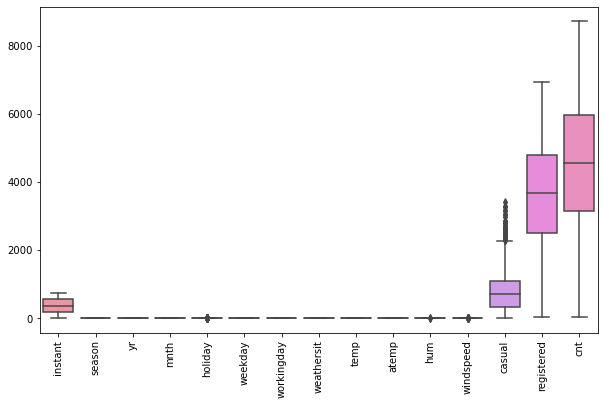

In [17]:
# Диаграмма "ящик с усами" до масштабирования
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(data=dayDf[numb_columns])
plt.show()

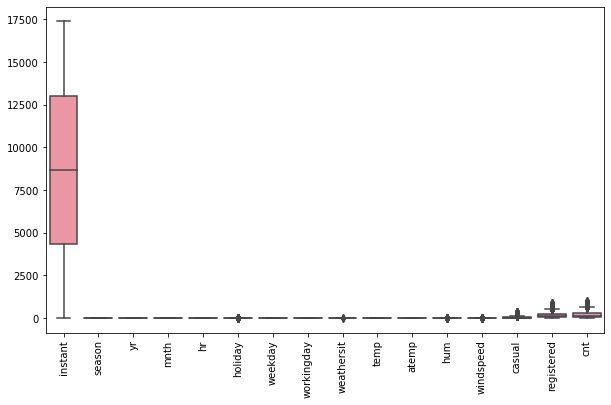

In [18]:
# Диаграмма "ящик с усами" до масштабирования
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(data=hourDf[numb_columns1])
plt.show()

In [19]:
# Масштабирование данныx при помощи MinMaxScaler
# Для каждого значения в объекте MinMaxScaler вычитает минимальное значение в объекте и затем делит на диапазон.
# Диапазон - это разница между исходным максимумом и исходным минимумом.
scaler = preprocessing.MinMaxScaler()

dayDf[numb_columns] = scaler.fit_transform(dayDf[numb_columns])

dayDf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.000000,0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792
1,0.001370,1,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623
2,0.002740,2,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669
3,0.004110,3,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174
4,0.005479,4,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546


In [20]:
# Масштабирование данныx при помощи MinMaxScaler
# Для каждого значения в объекте MinMaxScaler вычитает минимальное значение в объекте и затем делит на диапазон.
# Диапазон - это разница между исходным максимумом и исходным минимумом.
scaler = preprocessing.MinMaxScaler()

hourDf[numb_columns1] = scaler.fit_transform(hourDf[numb_columns1])

hourDf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.000000,0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.224490,0.2879,0.81,0.0,0.008174,0.014673,0.015369
1,0.000058,0,0.0,0.0,0.0,0.043478,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.021798,0.036117,0.039959
2,0.000115,0,0.0,0.0,0.0,0.086957,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.013624,0.030474,0.031762
3,0.000173,0,0.0,0.0,0.0,0.130435,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,0.008174,0.011287,0.012295
4,0.000230,0,0.0,0.0,0.0,0.173913,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,0.000000,0.001129,0.000000


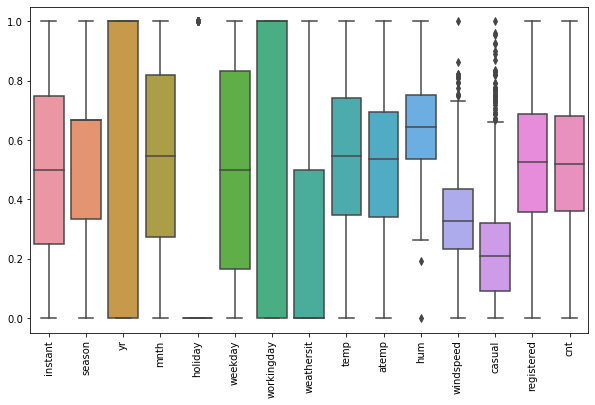

In [21]:
# Диаграмма "ящик с усами" после масштабирования
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(data=dayDf[numb_columns])
plt.show()

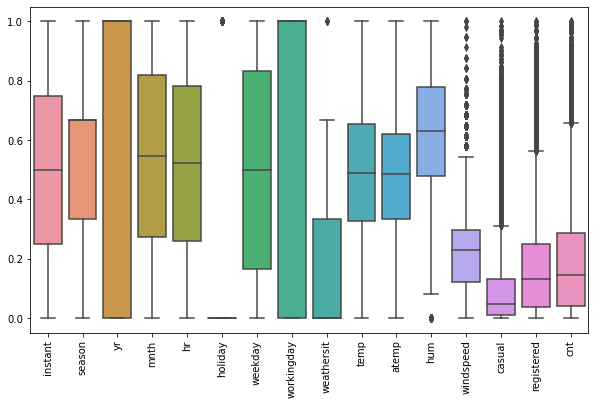

In [22]:
# Диаграмма "ящик с усами" после масштабирования
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(data=hourDf[numb_columns1])
plt.show()

## 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

<AxesSubplot:>

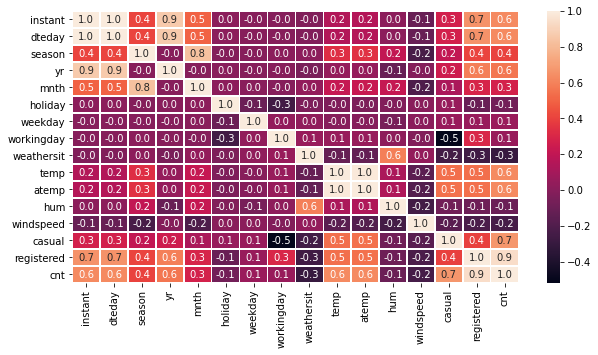

In [23]:
# Положимельный коэф корреляции - прямая зависимость между признаками
# Отрицательный коэф корреляции - обратная зависимость между признаками
# Коэф корреляуии близкий к 0 - признаки не зависимы
# Используем метод corr() для вычисления корреляции Пирсона
corr = dayDf.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt = '.1f', linewidths = .5)
# fmt - Код форматирования строк для использования при добавлении аннотаций.
# linewidths - ширина линий, разделяющих ячейки

<AxesSubplot:>

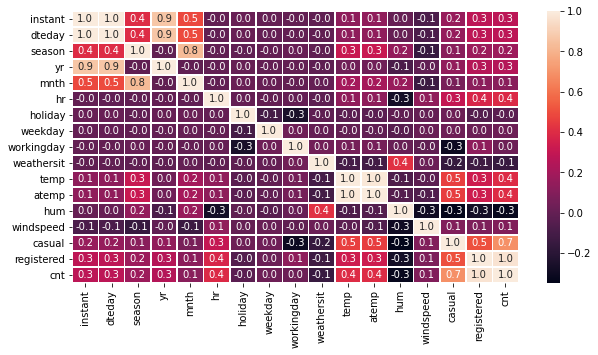

In [24]:
# Положимельный коэф корреляции - прямая зависимость между признаками
# Отрицательный коэф корреляции - обратная зависимость между признаками
# Коэф корреляуии близкий к 0 - признаки не зависимы
# Используем метод corr() для вычисления корреляции Пирсона
corr = hourDf.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt = '.1f', linewidths = .5)
# fmt - Код форматирования строк для использования при добавлении аннотаций.
# linewidths - ширина линий, разделяющих ячейки

<AxesSubplot:>

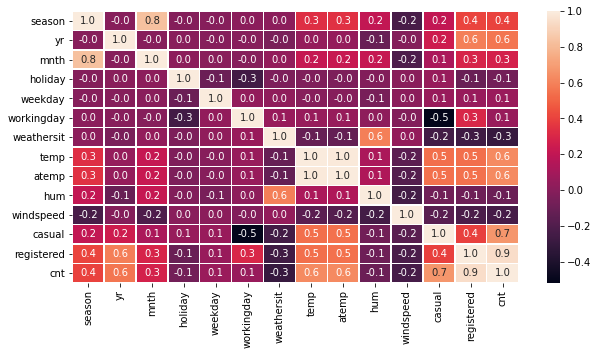

In [25]:
# Удаляем признак, который коррелирует с наибольшим числом других 
# Больше всего единиц
corr = dayDf.drop(['instant', 'dteday'], axis=1).corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt = '.1f', linewidths = .5)

<AxesSubplot:>

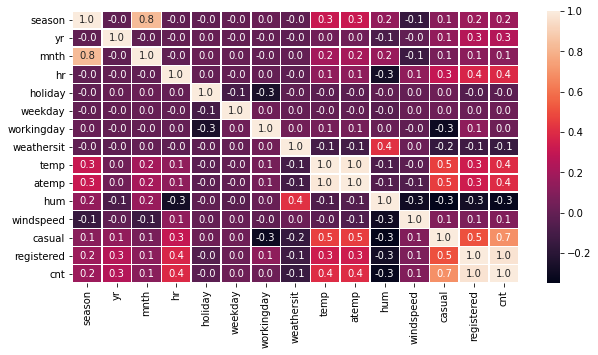

In [26]:
# Удаляем признак, который коррелирует с наибольшим числом других 
# Больше всего единиц
corr = hourDf.drop(['instant', 'dteday'], axis=1).corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt = '.1f', linewidths = .5)

## 6.	Заполните пропущенные значения в данных;

In [27]:
dayDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    float64
 1   dteday      731 non-null    int32  
 2   season      731 non-null    float64
 3   yr          731 non-null    float64
 4   mnth        731 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    float64
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    float64
 14  registered  731 non-null    float64
 15  cnt         731 non-null    float64
dtypes: float64(15), int32(1)
memory usage: 88.6 KB


In [28]:
hourDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  float64
 1   dteday      17379 non-null  int32  
 2   season      17379 non-null  float64
 3   yr          17379 non-null  float64
 4   mnth        17379 non-null  float64
 5   hr          17379 non-null  float64
 6   holiday     17379 non-null  float64
 7   weekday     17379 non-null  float64
 8   workingday  17379 non-null  float64
 9   weathersit  17379 non-null  float64
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  float64
 15  registered  17379 non-null  float64
 16  cnt         17379 non-null  float64
dtypes: float64(16), int32(1)
memory usage: 2.2 MB


## 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [43]:
# 3 – линейная регрессия, RIDGE регуляризатор

# x - признаки   y - ответы
x, y = hourDf.drop(['instant', 'season','yr', 'mnth', 'holiday'], axis=1), hourDf['instant']

# Разбиение данных на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

reg = linear_model.Ridge (alpha = .5)
reg.fit (x_train, y_train)

Ridge(alpha=0.5)

In [44]:
# вектор параметров
reg.coef_

array([ 1.37428415e-03,  1.25737409e-03, -2.42905714e-05, -3.40558677e-05,
        1.85628842e-05,  1.49588311e-03, -1.93171344e-03, -4.39407543e-04,
       -3.77799253e-04, -5.94113047e-05,  1.09630330e-04,  7.71808642e-05])

In [45]:
# предсказываем значения по тестовой x выборке
xt = reg.predict(x_test)
print(xt[:10])

[0.7381256  0.50041015 0.40849674 0.70356178 0.02227047 0.06196365
 0.66787474 0.45961887 0.5981105  0.40584707]


In [46]:
# Вычисление разницы между реальными и предсказанными значениями
print(xt[:10]-y_test[:10])

12830   -0.000164
8688     0.000468
7091     0.000452
12230   -0.000202
431     -0.002531
1086    -0.000529
11605    0.000076
7983     0.000245
10391    0.000171
7046     0.000392
Name: instant, dtype: float64


In [47]:
# Вычисление корреляций Пирсона и Спирмена между реальными и 
# предсказанными значениями
P, p_value_P = pearsonr(xt, y_test)
S, p_value_S = spearmanr(xt, y_test)
print("Корреляция Пирсона:  ", P, 'p_value: ', p_value_P)
print("Корреляция Спирмена: ", S, "p_value: ", p_value_S)

Корреляция Пирсона:   0.9999960624043955 p_value:  0.0
Корреляция Спирмена:  0.9999999663061022 p_value:  0.0


In [48]:
# разделим полученные данные на данные для обучения и теста
x, y = hourDf.drop(['instant', 'season','yr', 'mnth', 'holiday'], axis=1), hourDf['instant']

# Разбиение данных на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [49]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
pred_regr = regr.predict(x_test)
print(pred_regr[:10] - y_test[:10])

12830   -0.000155
8688     0.000472
7091     0.000454
12230   -0.000200
431     -0.002526
1086    -0.000534
11605    0.000079
7983     0.000240
10391    0.000169
7046     0.000388
Name: instant, dtype: float64


In [50]:
corr = {}
corr['pearson'], pvalue_pearson = pearsonr(pred_regr, y_test)
corr['spearman'], pvalue_spearman = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'], '   p-value: ', pvalue_pearson)
print('spearmen correlation: ', corr['spearman'], '   p-value: ', pvalue_spearman)

pearson correlation:  0.9999960627102222    p-value:  0.0
spearmen correlation:  0.9999999626658067    p-value:  0.0
